In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


# Descriptive Analyze

In [2]:
data = pd.read_csv('/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
data_short =  data.iloc[1:10000] #take a part of the data

data_short.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
data['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Western Victoria',
       'Eastern Victoria'], dtype=object)

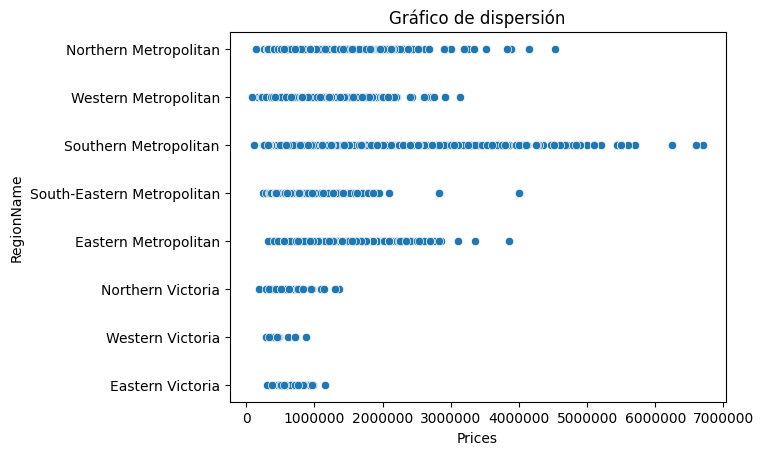

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


#create a scatter plot with seaborn
sns.scatterplot( y=data_short['Regionname'], x=data_short['Price'],  data=data)

plt.ticklabel_format(style='plain', axis='x')

# add details with plt
plt.title('Gráfico de dispersión')
plt.xlabel('Prices')
plt.ylabel('RegionName')


# Muestra el gráfico
plt.show()


In [6]:
features = data[['Rooms','Regionname', 'Method','Type','Suburb','Regionname', 'Distance', 'Propertycount', 'CouncilArea']]

features.head()


,Rooms,Regionname,Method,Type,Suburb,Regionname,Distance,Propertycount,CouncilArea
0,3,Northern Metropolitan,S,h,Abbotsford,Northern Metropolitan,3.0,4019,Yarra City Council
1,3,Northern Metropolitan,S,h,Abbotsford,Northern Metropolitan,3.0,4019,Yarra City Council
2,3,Northern Metropolitan,S,h,Abbotsford,Northern Metropolitan,3.0,4019,Yarra City Council
3,3,Western Metropolitan,S,h,Aberfeldie,Western Metropolitan,7.5,1543,Moonee Valley City Council
4,2,Western Metropolitan,S,h,Airport West,Western Metropolitan,10.4,3464,Moonee Valley City Council


In [7]:
from sklearn.preprocessing import OrdinalEncoder #transform the cualitative data in cuantitative data

Encoder = OrdinalEncoder() #put de ordinalencoder fuction

names_cat =  features.select_dtypes(include='object').columns

features[names_cat] = Encoder.fit_transform(features[names_cat]) 



/tmp/ipykernel_18/182874786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[names_cat] = Encoder.fit_transform(features[names_cat])


# creation of model

In [8]:
y = data['Price']
y =  y.fillna(y.mean())

X = features


In [9]:
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor()
regressor.fit(X,y)

DecisionTreeRegressor()

In [10]:
regressor.predict(features)  #predict the mean of amount of cost of the Houses

array([1263251.32808504, 1263251.32808504, 1263251.32808504, ...,
        482174.44937753,  855923.68111618,  923949.12074412])

# Model validation